<p style="text-align:left;">
   <a href="../README.md">Ir al menú anterior</a>
   <span style="float:right;">
        <a href="../README.md">Ir a la unidad anterior</a>
   </span>
</p>

-----

# La partícula libre

<div class="alert alert-info" role="alert">
<strong>Info:</strong> Si crees que este notebook necesita algún cambio no dudes en <a href="../../../../UIBCDF-Academia/Como_contribuir/Como_contribuir.md" class="alert-link">contribuir a su desarrollo</a>.
</div>

<br>

- [Simulación del sistema](#Simulación-del-sistema)
- [Script de Python](#Script-de-Python)
- [El sistema en OpenMolecularSystems](#El-sistema-en-OpenMolecularSystems)

## Simulación del sistema

Las siguientes celdas recojen las instrucciones necesarias para simular la dinámica de Langevin de una partícula libre con OpenMM. La trayectoria (tiempos, posiciones y velocidades) son guardadas como numpy arrays.

In [1]:
import numpy as np
from tqdm import tqdm
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

In [2]:
# Definición del sistema.

n_particles = 1
mass = 180.15 * unit.amu # masa de la glucosa

# Creación del sistema.

system = mm.System()
system.addParticle(mass)
#for ii in range(n_particles):
#    system.addParticle(mass)

0

In [3]:
# Definición del estado termodinámico y el integrador.

step_size = 0.1*unit.picoseconds
temperature = 300*unit.kelvin
friction = 1.0/unit.picosecond # Damping para la dinámica de Langevin

integrator = mm.LangevinIntegrator(temperature, friction, step_size)

In [4]:
# Creación de la plataforma.

platform_name = 'CUDA'
platform = mm.Platform.getPlatformByName(platform_name)

In [5]:
# Creación del contexto.

context = mm.Context(system, integrator, platform)

In [6]:
# Condiciones iniciales

initial_positions  = np.zeros([n_particles, 3], np.float32) * unit.angstroms
initial_velocities = np.zeros([n_particles, 3], np.float32) * unit.angstroms/unit.picoseconds

context.setPositions(initial_positions)
context.setVelocities(initial_velocities)

In [11]:
# Parámetros de la simulación.

simulation_time = 2.0*unit.nanosecond
saving_time = 1.0*unit.picoseconds

In [12]:
n_steps_per_period = int(saving_time/step_size) # número de pasos del periodo de guardado
n_periods = int(simulation_time/saving_time) # número de periodos guardados

In [24]:
n_steps_per_period

10

In [16]:
# Creación de arrays reporteros del tiempo, la posición y la velocidad.

times = np.zeros([n_periods], np.float32) * unit.picoseconds
positions = np.zeros([n_periods, n_particles, 3], np.float32) * unit.angstroms
velocities = np.zeros([n_periods, n_particles, 3], np.float32) * unit.angstroms/unit.picosecond

In [21]:
# Almacenamiento en reporteros de las condiciones iniciales para tiempo 0

state = context.getState(getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()
velocities[0] = state.getVelocities()

In [23]:
# Ejecuto el bucle sobre el número de periodos que vamos a simular

for ii in tqdm(range(1, n_periods)):
    context.getIntegrator().step(n_steps_per_period)
    state = context.getState(getPositions=True, getVelocities=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()
    velocities[ii] = state.getVelocities()

100%|██████████| 1999/1999 [00:01<00:00, 1489.10it/s]


Podemos guardar los arrays en un fichero con pickle para su posterior lectura:

In [ ]:
import pickle

file = open('traj.pkl','wb')
pickle.dump( times, file )
pickle.dump( positions, file )
pickle.dump( velocities, file )
file.close()

Podemos rescatar los arrays del fichero de la siguiente manera:

In [ ]:
file = open('traj.pkl','rb')
times = pickle.load(file)
positions = pickle.load(file)
velocities = pickle.load(file)
file.close()

Por último podemos representar gráficamente la trayectoria con la libreria Matplotlib:

In [25]:
import matplotlib.pyplot as plt

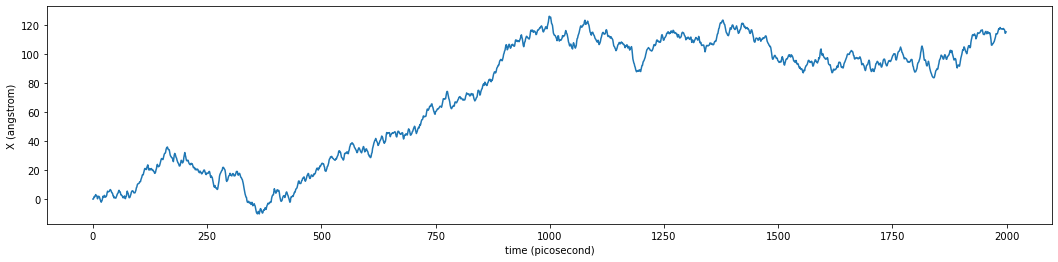

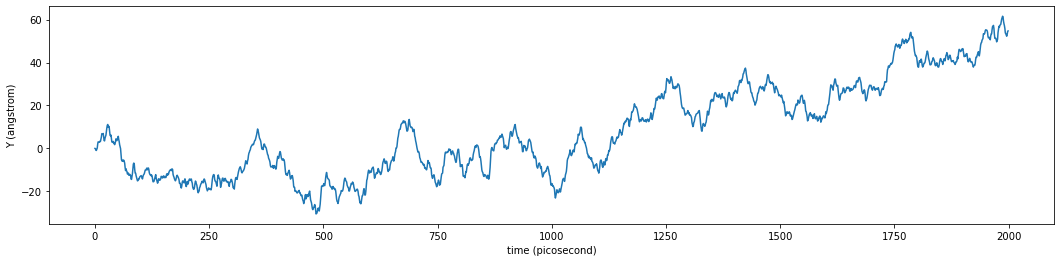

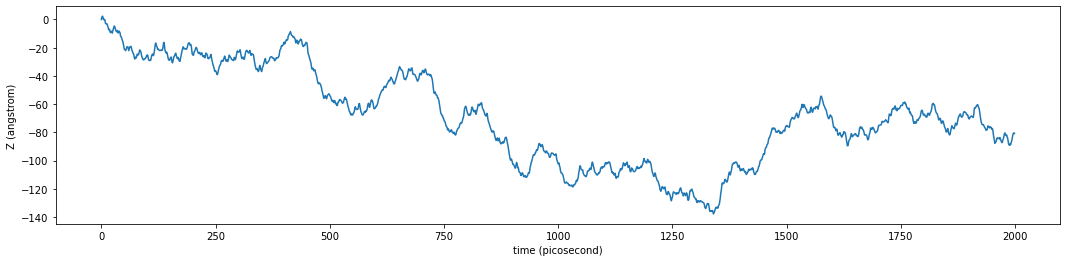

In [26]:
plt.rcParams['figure.figsize'] = 18, 4

for ii, axis_label in zip(range(3),['X','Y','Z']):
    plt.plot(times, positions[:,0,ii])
    plt.ylabel('{} ({})'.format(axis_label, positions.unit))
    plt.xlabel('time ({})'.format(times.unit))
    plt.show()


O si preferimos, la trayectoria proyectada por el espacio de dos de las dimensiones, por ejemplo $X$ y $Y$:

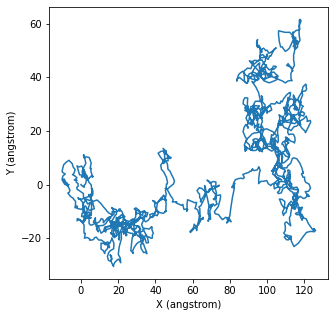

In [27]:
plt.rcParams['figure.figsize'] = 5, 5

plt.plot(positions[:,0,0], positions[:,0,1])
plt.xlabel('X ({})'.format(positions.unit))
plt.ylabel('Y ({})'.format(positions.unit))
plt.show()

Borremos el fichero creado:

In [ ]:
import os
os.remove('traj.pkl')

## Script de Python

El flujo de ordenes anteriores para llevar a cabo la simulación de una partícula libre en un jupyter notebook, puede ser encontrada también en forma de script en el directorio 'data/openmm_scripts' del repositorio de UIBCDF-Academia en GitHub con el nombre ['particula_libre.py'][script_python]. Este puede ser ejecutado en la terminal mediante el siguiente comando:

```bash
python particular_libre.py
```

Se genera un archivo llamado 'traj.pkl' con la compresión mediante la librería pickle de los numpy array para el tiempo, las posiciones y las velocidades guardados a intervalos de tiempo definidos en el script.

[script_python]: https://github.com/uibcdf/Academia/tree/main/data

## El sistema en OpenMolecularSystems

El sistema molecular, en este caso la partícula libre, se encuentra disponible en la librería [OpenMolecularSystem](http://www.uibcdf.org/OpenMolecularSystems) desarrollada en la UIBCDF. El sistema puede ser simulado en distintas circunstancias de manera más cómoda haciendo uso de esta libreria.

<div style='text-align: right;'> <a href="../xxx.ipynb">Ir a la siguiente unidad</a> </div>

-------
<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/uibcdf/Academia">UIBCDF-Academia</a> por <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://github.com/uibcdf/Academia/graphs/contributors">UIBCDF Lab, autores y colaboradores</a> es material protegido bajo una licencia <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/deed.es?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-NonCommercial-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p>
